# Investigate a Dataset (No-Show-Appointments)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics 
 about the patient are included in each row.
 
•	‘ScheduledDay’ tells us on what day the patient set up their appointment. 

•	‘Neighborhood’ indicates the location of the hospital.  

•	‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família 

•	‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


> **Tip**: Questions I want to get its answers

1.	Does health status of the patient affect his showing up? 
2.	Is it effective to remind by an SMS? 
3.	Does not having a scholarship mean higher rate of showing up? 
4.	Who miss appointment more? male or female? 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

<a id='wrangling'></a>
## 1. Data Wrangling

> **Tip**: In this section we will be taking a look at dataset and check if there is anything that needs to be modified or cleaned

### 1.1 read csv file and get the five rows of the dataset

In [93]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

### 1.2 get information about the features

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 1.3 get describtion of dataset

In [95]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

### 1.4 Identify how many row/columns in the dataset

In [96]:
df.shape

(110527, 14)

The dataset has 14 columns and 110527 rows

### 1.5 Check Null values

In [97]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Results shows no nulls which is good.

### After looking at the dataset, there is things need to be modified

1. Remove unecessairly features
2. Change data types of some features
3. Change one feature records to be more understandable and logical
4. Fix some 'Age' records that seems not logical.

<a id='cleaning'></a>

## 2. Data cleaning

> **Tip**: In this section we will clean and fix some dataset features.

### 2.1 Change data types of (Appointment) and (scheduled day)

In [98]:
df_clean = df
df_clean['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], infer_datetime_format = True)
df_clean['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], infer_datetime_format = True)
df_clean['ScheduledDay'] = pd.DatetimeIndex(df_clean.ScheduledDay).normalize()
df_clean.head() 

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589980e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262960e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679510e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841190e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

From the output we can see that data type has been modified

### 2.2 Check incorrect values and replace it with the mean.

In [99]:
incorrect = df_clean[(df.Age<=0)]
df_clean.replace(0, df["Age"].mean())

PatientId  AppointmentID Gender ScheduledDay AppointmentDay   Age  \
0       2.987250e+13        5642903      F   2016-04-29     2016-04-29  62.0   
1       5.589980e+14        5642503      M   2016-04-29     2016-04-29  56.0   
2       4.262960e+12        5642549      F   2016-04-29     2016-04-29  62.0   
3       8.679510e+11        5642828      F   2016-04-29     2016-04-29   8.0   
4       8.841190e+12        5642494      F   2016-04-29     2016-04-29  56.0   
...              ...            ...    ...          ...            ...   ...   
110522  2.572130e+12        5651768      F   2016-05-03     2016-06-07  56.0   
110523  3.596270e+12        5650093      F   2016-05-03     2016-06-07  51.0   
110524  1.557660e+13        5630692      F   2016-04-27     2016-06-07  21.0   
110525  9.213490e+13        5630323      F   2016-04-27     2016-06-07  38.0   
110526  3.775120e+14        5629448      F   2016-04-27     2016-06-07  54.0   

            Neighbourhood  Scholarship  Hipertension   Diabetes  Alcoholism  \
0         JARDIM DA PENHA    37.088874      1.000000  37.088874   37.088874   
1         JARDIM DA PENHA    37.088874     37.088874  37.088874   37.088874   
2           MATA DA PRAIA    37.088874     37.088874  37.088874   37.088874   
3       PONTAL DE CAMBURI    37.088874     37.088874  37.088874   37.088874   
4         JARDIM DA PENHA    37.088874      1.000000   1.000000   37.088874   
...                   ...          ...           ...        ...         ...   
110522        MARIA ORTIZ    37.088874     37.088874  37.088874   37.088874   
110523        MARIA ORTIZ    37.088874     37.088874  37.088874   37.088874   
110524        MARIA ORTIZ    37.088874     37.088874  37.088874   37.088874   
110525        MARIA ORTIZ    37.088874     37.088874  37.088874   37.088874   
110526        MARIA ORTIZ    37.088874     37.088874  37.088874   37.088874   

          Handcap  SMS_received No-show  
0       37.088874     37.088874      No  
1       37.088874     37.088874      No  
2       37.088874     37.088874      No  
3       37.088874     37.088874      No  
4       37.088874     37.088874      No  
...           ...           ...     ...  
110522  37.088874      1.000000      No  
110523  37.088874      1.000000      No  
110524  37.088874      1.000000      No  
110525  37.088874      1.000000      No  
110526  37.088874      1.000000      No  

[110527 rows x 14 columns]

### 2.3 Make (No_show) feature more logical.

 #### 2.3.1 change its name

In [100]:
df_clean.rename(columns={'No-show':'Showed'}, inplace=True)
df_clean.head() 

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589980e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262960e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679510e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841190e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received Showed  
0        0             0     No  
1        0             0     No  
2        0             0     No  
3        0             0     No  
4        0             0     No

Output shows it has been changed

#### 2.3.2 replaca value (yes) with 0 and the value (No) with 1

In [101]:
df_clean.Showed[df_clean['Showed']=='Yes'] = 0
df_clean.Showed[df_clean['Showed']=='No'] = 1
df_clean['Showed'].value_counts()

<ipython-input-101-c07d162647df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Showed[df_clean['Showed']=='Yes'] = 0
<ipython-input-101-c07d162647df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Showed[df_clean['Showed']=='No'] = 1


1    88208
0    22319
Name: Showed, dtype: int64

### 2.4 Drop PatientId and Neighbourhood features

In [102]:
del df_clean['PatientId']
del df_clean['Neighbourhood']

df_clean.head()

AppointmentID Gender ScheduledDay AppointmentDay  Age  Scholarship  \
0        5642903      F   2016-04-29     2016-04-29   62            0   
1        5642503      M   2016-04-29     2016-04-29   56            0   
2        5642549      F   2016-04-29     2016-04-29   62            0   
3        5642828      F   2016-04-29     2016-04-29    8            0   
4        5642494      F   2016-04-29     2016-04-29   56            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received Showed  
0             1         0           0        0             0      1  
1             0         0           0        0             0      1  
2             0         0           0        0             0      1  
3             0         0           0        0             0      1  
4             1         1           0        0             0      1

### 2.5 Check number of showed appointments

In [103]:
df_clean['Showed'].value_counts()

1    88208
0    22319
Name: Showed, dtype: int64

Number of No showed appointments is greater than showed appointments

<a id='eda'></a>
## 3. Exploratory Data Analysis (EDA)

> **Tip**: In this section we will be exploring and analysing data using visualization and more.

### 3.1 Histogram plot for all dataset features

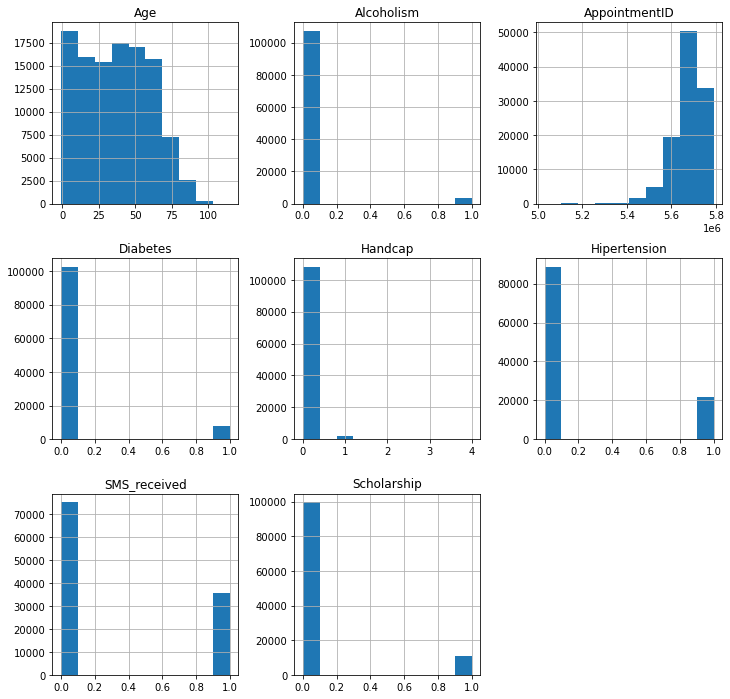

In [104]:
df.hist(figsize=(12,12));

### 3.2 The Process to know who miss apointment more, male or female?

Text(0.5, 1.0, 'Distribution of Show/No Show appointments')

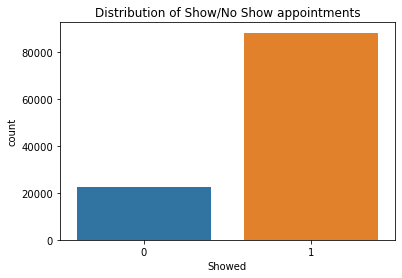

In [105]:
sns.countplot(data=df_clean, x='Showed')
plt.title('Distribution of Show/No Show appointments')

From the plot we can see that who did not show the appointment are more than those who showed

In [106]:
df_clean.corr()

AppointmentID       Age  Scholarship  Hipertension  Diabetes  \
AppointmentID       1.000000 -0.019126     0.022615      0.012752  0.022628   
Age                -0.019126  1.000000    -0.092457      0.504586  0.292391   
Scholarship         0.022615 -0.092457     1.000000     -0.019729 -0.024894   
Hipertension        0.012752  0.504586    -0.019729      1.000000  0.433086   
Diabetes            0.022628  0.292391    -0.024894      0.433086  1.000000   
Alcoholism          0.032944  0.095811     0.035022      0.087971  0.018474   
Handcap             0.014106  0.078033    -0.008586      0.080083  0.057530   
SMS_received       -0.256618  0.012643     0.001194     -0.006267 -0.014550   

               Alcoholism   Handcap  SMS_received  
AppointmentID    0.032944  0.014106     -0.256618  
Age              0.095811  0.078033      0.012643  
Scholarship      0.035022 -0.008586      0.001194  
Hipertension     0.087971  0.080083     -0.006267  
Diabetes         0.018474  0.057530     -0.014550  
Alcoholism       1.000000  0.004648     -0.026147  
Handcap          0.004648  1.000000     -0.024161  
SMS_received    -0.026147 -0.024161      1.000000

Text(0.5, 1.0, 'Correlations between features')

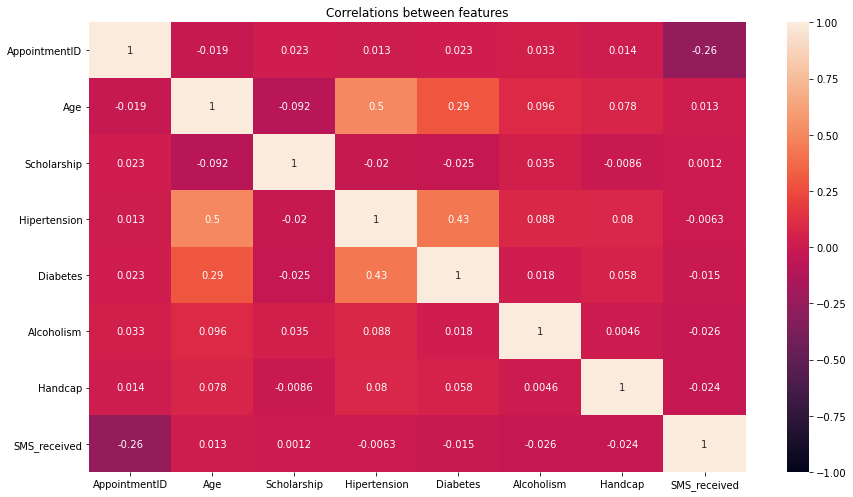

In [107]:
 #heatmap to show correlations
plt.figure(figsize=[14.7,8.27])
sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlations between features')

From correlation metrix and heatmap we can see that it does not help us in finding relationship between 'Gender' and 'Showed' features but we can summarize that 'Hipertension' have 0.5 correlation with 'Age' and also other health status are .43 correlated with each other

In [124]:
#function to create labels

def myLabel(title,xlabel,ylabel):
    
    plt.title(title, fontsize=12, weight= 'bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #plot results
    #prop.plot.bar(figsize=(14.7, 8.27), rot=0)
    
def myFunction():
    
    locations = ([.30/2,2.30/2]) 
    labels = ['No', 'Yes'] 
    plt.xticks(locations, labels)
    plt.legend();

In [125]:
Count = df_clean.groupby(['Gender','Showed'])['AppointmentID'].count()
Total = df_clean.groupby(['Gender'])['AppointmentID'].count()
Prop = Count / Total
Prop

Gender  Showed
F       0         0.203146
        1         0.796854
M       0         0.199679
        1         0.800321
Name: AppointmentID, dtype: float64

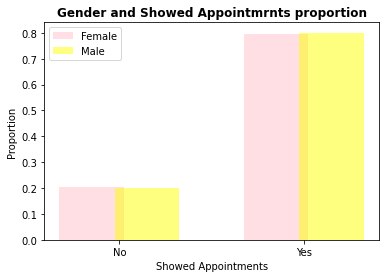

In [126]:
#Cont.

ind = [0,1]  #the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
female_bars = plt.bar(ind, Prop['F'], width, color='pink', alpha=.5, label='Female')
male_bars = plt.bar([.30,1.30] , Prop['M'], width, color='yellow', alpha=.5, label='Male')

#labels
myLabel('Gender and Showed Appointmrnts proportion', 'Showed Appointments','Proportion' )
#plt.ylabel('Proportion')
#plt.xlabel('Showed Appointement')
#plt.title('Gender and Showed Appointments proportion ')
myFunction()

We find from the output that both genders has equivelent no-showed and showed appointments so there's no strong relationship between them.

### 3.3 Process to know if having scholarship means higher rate of showing up or not.

In [127]:
s = df_clean.query('Showed == 0').groupby(['Scholarship'])['Gender'].count()
print(s)

Scholarship
0    19741
1     2578
Name: Gender, dtype: int64


In [128]:
#Cont.

totalS =  df_clean.groupby(['Scholarship'])['Gender'].count()
prop = s / totalS *100
print(prop) 

Scholarship
0    19.807156
1    23.736304
Name: Gender, dtype: float64


We find that patients with scholarship have slightly higher proportion. 

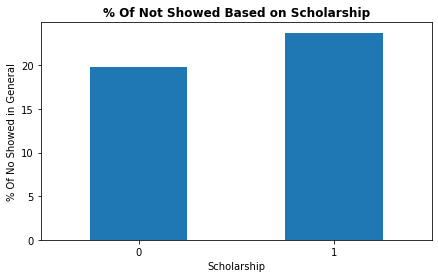

In [129]:
#Cont. - plot result
myLabel('% Of Not Showed Based on Scholarship', 'Scholarship', '% Of No Showed in General')
plt.xticks([0,1], ['No','Yes']);
prop.plot.bar(figsize=(7,4), rot=0)

The plot above ensures that patients with scholarship have slightly higher proportion. 

### 3.4 Process to show effectivness of SMS reminder

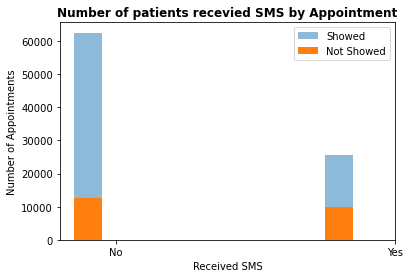

In [130]:
plt.hist(df_clean.SMS_received[df_clean['Showed'] == 1], alpha=.5, label='Showed')
plt.hist(df_clean.SMS_received[df_clean['Showed'] == 0], alpha=1, label='Not Showed')
# labels
myLabel('Number of patients recevied SMS by Appointment','Received SMS','Number of Appointments'  )
#plt.ylabel('Number of appointments')
#plt.xlabel('Received SMS')
#plt.title('Number of patients recevied SMS by Appointment Show-up ')

myFunction()

We find that SMS reminder didn't increase show ups

### 3.5 Process to show effectiveness of health status towards showing up

In [131]:
df_clean['sick'] = 0

In [132]:
#Cont.
df_clean.sick[df_clean['Handcap'] == 1] = 1
df_clean.sick[df_clean['Hipertension'] == 1] = 1
df_clean.sick[df_clean['Diabetes'] == 1] = 1

<ipython-input-132-94c4bedc0b5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sick[df_clean['Handcap'] == 1] = 1
<ipython-input-132-94c4bedc0b5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sick[df_clean['Hipertension'] == 1] = 1
<ipython-input-132-94c4bedc0b5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sick[df_clean['Diabetes'] == 1] = 1


In [133]:
#Proportion of sick patients who showed up and missed the appointement.
count_sick = df_clean.groupby(['sick','Showed'])['AppointmentID'].count()
total_sick = df_clean.groupby(['sick'])['AppointmentID'].count()
prop_sick = count_sick / total_sick
print(prop_sick)

sick  Showed
0     0         0.209356
      1         0.790644
1     0         0.175698
      1         0.824302
Name: AppointmentID, dtype: float64


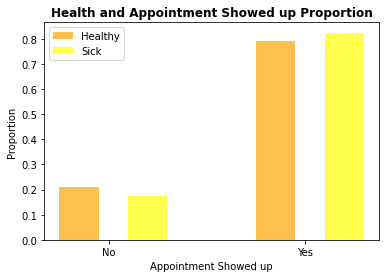

In [134]:
#Cont.
ind = [0,1]  #the x locations for the groups
width = 0.2       #the width of the bars
#bars
healthy_bars = plt.bar(ind, prop_sick[0], width, color='orange', alpha=.7, label='Healthy')
sick_bars = plt.bar([.35,1.35] , prop_sick[1], width, color='yellow', alpha=.7, label='Sick')

#labels
myLabel('Health and Appointment Showed up Proportion','Appointment Showed up','Proportion'  )
#plt.ylabel('Proportion')
#plt.xlabel('Appointment Showed up')
#plt.title('Health and Appointment Showed up Proportion ')

myFunction()

We find from result that healthy patients miss more appointments, The correlation is not specific maybe because of the limited dataset.

<a id='conclusions'></a>

## 4. Conclusion

### 4.1 Findings
1.	We find that both genders has equivalent not showed and showed  appointments, so there’s no strong correlation between gender and missing appointments. 

2.	We find that patients with scholarship have slightly higher proportion of showing ups. 

3.	We find that SMS reminders does not increase show-ups, so its not that effective. 

4.	We find that healthy status people miss more appointments than who have health issues (sick people) , yet the correlation is not that specific. 


### 4.2 Limitations
To sum-up, I can see that this dataset is not that perfect because it focuses on “no show” thus, it is biased. Also the results can be more accurate and benefitable if we have more information. 

In [135]:
df_clean.to_csv("No-Show-Appointments.csv") 